<a href="https://colab.research.google.com/github/davidest1995/personal_projects/blob/main/An%C3%A1lisis_loter%C3%ADa_de_Medell%C3%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Se hará un análisis estadístico con los resultados de la lotería de medellín, en el que se estudiará primero estadísticos basicos de la data, segundo la probabilidad de cada una de las bolas y series por separado con ayuda de esquemas visuales y gráficos.

##Se importan las librerías necesarias para el análisis

In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
# sns para acotar el graf
import matplotlib.pyplot as plt


##**Lectura** de la data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving lotmed.csv to lotmed.csv


In [3]:
lotmed = pd.read_csv(io.BytesIO(uploaded['lotmed.csv']))
lotmed.head()

,FECHA DE JUEGO,SORTEO,NÚMERO,SERIE
0,01/05/2007 12:00:00 AM,3834,3652,149
1,01/12/2007 12:00:00 AM,3835,9407,80
2,01/19/2007 12:00:00 AM,3836,9864,97
3,01/26/2007 12:00:00 AM,3837,5589,54
4,02/02/2007 12:00:00 AM,3838,1721,102


# Análisis estadístico.

In [19]:
from statistics import mode


moda_num = lotmed['NÚMERO'].mode()
print('Los números han caído minimo dos veces repetidas son : {} '.format(moda_num))

print('La serie que más se han repetido es : {} '.format(mode(lotmed['SERIE'])))

Los números han caído minimo dos veces repetidas son : 0       99
1      169
2      265
3      268
4      539
5      575
6      863
7     1363
8     1515
9     1721
10    1897
11    2350
12    2416
13    2570
14    2727
15    2816
16    3045
17    3257
18    4468
19    4637
20    4702
21    5249
22    5589
23    6566
24    6620
25    6645
26    6935
27    7307
28    7321
29    7403
30    7707
31    7852
32    8207
33    8251
34    9063
35    9129
dtype: int64 
La serie que más se han repetido es : 53 


In [5]:
rep_num = lotmed['NÚMERO'].value_counts()
print('Los números que se repiten y su respectiva frecuencia son : {}'.format(rep_num))


rep_serie = lotmed['SERIE'].value_counts()
print('Las series que más se repiten son  : {}'.format(rep_serie))


Los números que se repiten y su respectiva frecuencia son : 9063    2
7852    2
169     2
7307    2
575     2
       ..
2271    1
4286    1
860     1
7298    1
6451    1
Name: NÚMERO, Length: 761, dtype: int64
Las series que más se repiten son  : 53     10
166     7
16      6
73      6
152     6
       ..
18      1
117     1
62      1
27      1
367     1
Name: SERIE, Length: 295, dtype: int64


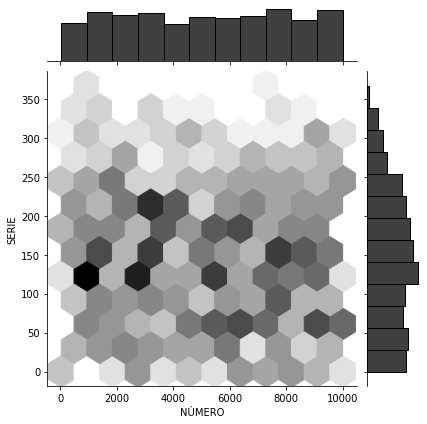

In [6]:
graf=sns.jointplot(data= lotmed, x='NÚMERO', y='SERIE', kind='hex', color='black')
# graf.plot_joint(sns.kdeplot, color='r', zorder=0, level= 20)
# graf.plot_marginals(sns.rugplot, color='r', height=-.03, clip_on= False)

In [7]:
num_list = lotmed['NÚMERO'] 
num_list.head(5)

0    3652
1    9407
2    9864
3    5589
4    1721
Name: NÚMERO, dtype: int64

## A continuación se hará una evaluación de la frecuencia con la que ha caído cada dígito de número.

In [8]:
single_num = []

def split_value():
  for i in num_list:
    str_value = str(i)
    if len(str_value) == 3:
      add_cero = '0' + str_value
    elif len(str_value) == 2:
      add_cero = '00' + str_value
    elif len(str_value) == 1:
      add_cero = '000' + str_value
    else:
      add_cero = str_value
    for x in range(len(add_cero)):
      single_num.append(add_cero[x])
          
if __name__ == '__main__':
  split_value()


### El siguiente gráfico muestra que los cuatro dígitos que más han caído en las diferentes urnas donde juegan los números son : 2,5,9,7 en ese mismo orden.

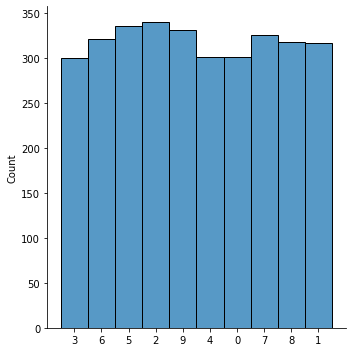

In [9]:
sns.displot(data=single_num)

### Se calculará mediante porcentajes la frecuencia global de los números que más han caído en la lotería de Medellín

In [10]:
df=pd.DataFrame(single_num, columns= ['single_values'])
((df['single_values'].value_counts()/len(df))*100).sort_values(ascending=False)

2    10.664994
5    10.508156
9    10.382685
7    10.194479
6    10.069009
8     9.974906
1     9.912171
4     9.441656
0     9.441656
3     9.410289
Name: single_values, dtype: float64

### Se hará un muestreo sistemático, en el que se estudiará cada colúmna de número, referente al funcionamiento de la máquina, para ver cual es el número que más ha caído en cada una de las casillas.

## Columna número 1:

9    11.794228
1    10.915935
7    10.915935
2    10.288582
6    10.288582
5    10.037641
3     9.912171
4     8.908407
0     8.531995
8     8.406524
Name: single_values, dtype: float64

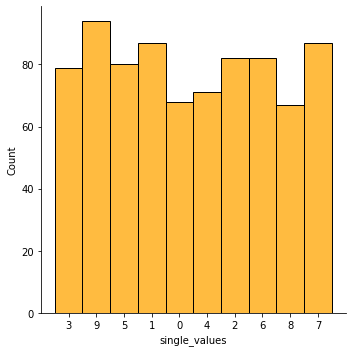

In [11]:
def systematic_sampling(df,step):
  global systematic_sample
  indexes = np.arange(0,len(df),step=step)
  systematic_sample = df.iloc[indexes]
  return systematic_sample

systematic_sample = systematic_sampling(df,4)

column_1 = systematic_sample['single_values']

sns.displot(data= column_1, color= 'orange')

((systematic_sample['single_values'].value_counts()/len(systematic_sample))*100).sort_values(ascending=False)

## Columna número 2:

5    11.292346
8    10.915935
6    10.414053
2    10.414053
3    10.163112
7    10.037641
4     9.535759
9     9.535759
0     9.159348
1     8.531995
Name: single_values, dtype: float64

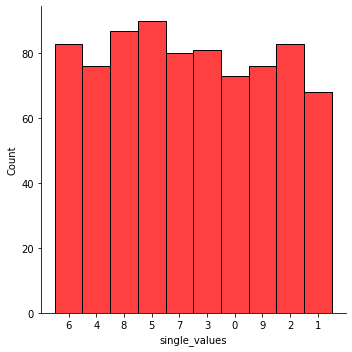

In [12]:
def systematic_sampling(df,step):
  indexes = np.arange(1,len(df),step=step)
  systematic_sample = df.iloc[indexes]
  return systematic_sample

systematic_sample = systematic_sampling(df,4)

column_2 = systematic_sample['single_values']

sns.displot(data= column_2, color= 'red')

((systematic_sample['single_values'].value_counts()/len(systematic_sample))*100).sort_values(ascending=False)

## Columna número 3:

0    11.166876
4    10.539523
5    10.414053
2    10.414053
7    10.288582
8    10.163112
6     9.535759
1     9.284818
3     9.284818
9     8.908407
Name: single_values, dtype: float64

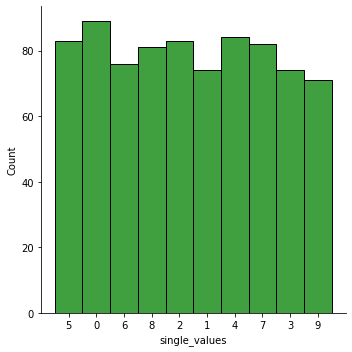

In [13]:
def systematic_sampling(df,step):
  indexes = np.arange(2,len(df),step=step)
  systematic_sample = df.iloc[indexes]
  return systematic_sample

systematic_sample = systematic_sampling(df,4)

column_3 = systematic_sample['single_values']

sns.displot(data= column_3, color= 'green')

((systematic_sample['single_values'].value_counts()/len(systematic_sample))*100).sort_values(ascending=False)

## Columna número 4:

2    11.543287
9    11.292346
1    10.915935
8    10.414053
5    10.288582
6    10.037641
7     9.535759
0     8.908407
4     8.782936
3     8.281054
Name: single_values, dtype: float64

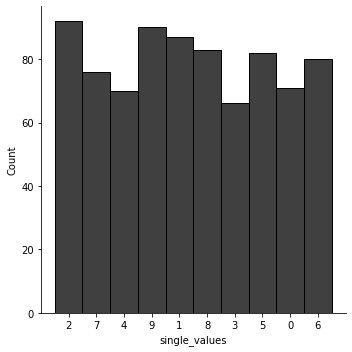

In [14]:
def systematic_sampling(df,step):
  indexes = np.arange(3,len(df),step=step)
  systematic_sample = df.iloc[indexes]
  return systematic_sample

systematic_sample = systematic_sampling(df,4)

column_4 = systematic_sample['single_values']

sns.displot(data= column_4, color= 'black')

((systematic_sample['single_values'].value_counts()/len(systematic_sample))*100).sort_values(ascending=False)


#Estudio del número de serie.

In [15]:
serie_list = lotmed['SERIE'] 
x=serie_list.sort_values(ascending=False)
x.head(10)

#Lísta de los 10 número de serie más altos que han caído

791    367
750    354
747    351
773    349
778    338
748    337
602    336
603    335
682    334
590    334
Name: SERIE, dtype: int64

In [16]:
single_serie = []

def split_serie():
  for i in serie_list:
    str_serie = str(i)
    if len(str_serie) == 2:
      add_cero = '0' + str_serie
    elif len(str_serie) == 1:
      add_cero = '00' + str_serie
    else:
      add_cero = str_serie
    for x in range(len(add_cero)):
      single_serie.append(add_cero[x])
          
if __name__ == '__main__':
  split_serie()

In [17]:
df_serie=pd.DataFrame(single_serie, columns= ['single_values'])
((df_serie['single_values'].value_counts()/len(df))*100).sort_values(ascending=False)

1    15.025094
0    13.456713
2    11.606023
3     7.120452
4     5.144291
6     4.956085
5     4.736512
8     4.360100
9     4.328733
7     4.265997
Name: single_values, dtype: float64

9    12.421581
4    11.041405
2    10.414053
3    10.037641
6     9.786700
8     9.661230
0     9.535759
5     9.284818
1     9.033877
7     8.782936
Name: single_values, dtype: float64

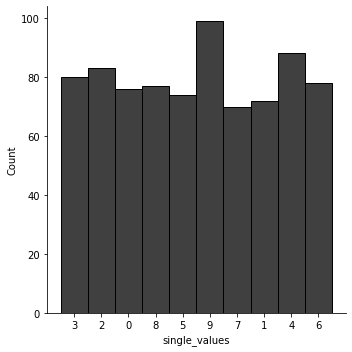

In [18]:
def systematic_sampling(df_serie,step):
  indexes = np.arange(0,len(df_serie),step=step)
  systematic_sample = df.iloc[indexes]
  return systematic_sample

systematic_sample = systematic_sampling(df_serie,3)

column_1_serie = systematic_sample['single_values']

sns.displot(data= column_1_serie, color= 'black')

((systematic_sample['single_values'].value_counts()/len(systematic_sample))*100).sort_values(ascending=False)